

# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In the movie database, data exploration will be applied then cleaning it to be prepared for the analysis stage as we can find relations between given features as popularity, rating, and the audience votes how is it associated with the total revenue of a movie, discovering the top genres that get the top votes and with using the power of python and Matplotlib package in visualizing our results helps us to clarify the facts and relationships between the given features helps to make the producers of the movies to take the right decisions and that can come true throughout asking the following question:

### Question(s) for Analysis
 



<ul>
<li><a href="#Q1">Q1: Which months of the year get more revenues? </a></li>
<br>
<li><a href="#Q2">Q2: How a Star's Fame change over the years?</a></li>
<br>
<li><a href="#Q3">Q3: Which genres of movies associated with more votes?</a></li>
<br>
<li><a href="#Q4">Q4: Which genres of movies come with more revenues? </a></li>
<br>
<li><a href="#Q5">Q5:How is budget, popularity ,revenue grew up over the years? </a></li>
<br>
<li><a href="#Q6">Q6: what is the most popular movies durations?</a></li>
<br>
<li><a href="#Q7">Q7: What is the most popular ratings for movies?</a></li>

</ul>


In [27]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.8MB/s eta 0:00:01   71% |███████████████████████         | 7.5MB 39.1MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.8MB/s eta 0:00:01   50% |████████████████▎               | 6.8MB 34.7MB/s eta 0:00:01    83% |██████████████████████████▊     | 11.2MB 25.8MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling


In [1]:
import numpy as np
import pandas as pd 
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
df = pd.read_csv('tmdb-movies.csv')

df.info() # overview on the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>Estimating null and duplicated values 

In [29]:
print(df.isnull().sum())
print(df.duplicated().sum())


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64
1



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

>removing unnecessary columns

In [30]:
df.drop(columns= ['homepage','imdb_id','tagline','keywords','production_companies'] ,inplace=True)


>processing null and duplicated values 

In [31]:
df.fillna(df.mean()) #fill missing numerical values by the mean 
df.drop_duplicates(inplace=True) #drop duplicates 


>checking for null elements

In [32]:
print(df.isnull().sum())


id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
overview           4
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64


>remove null elements

In [33]:

df.dropna(subset=['genres','director','cast','overview'],inplace=True)


>checking null and duplicates


In [34]:
print(df.isnull().sum().any())
print(df.duplicated().any())


False
False


>overview on data after cleaning

In [35]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10729 entries, 0 to 10865
Data columns (total 16 columns):
id                10729 non-null int64
popularity        10729 non-null float64
budget            10729 non-null int64
revenue           10729 non-null int64
original_title    10729 non-null object
cast              10729 non-null object
director          10729 non-null object
overview          10729 non-null object
runtime           10729 non-null int64
genres            10729 non-null object
release_date      10729 non-null object
vote_count        10729 non-null int64
vote_average      10729 non-null float64
release_year      10729 non-null int64
budget_adj        10729 non-null float64
revenue_adj       10729 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.4+ MB
None


In [36]:
df = df.sort_values(by='release_year', ascending=True) #sorting data by release year

>creating additional columns(features)

In [37]:
dateTimeVar = pd.to_datetime(df['release_date'])
df['month'] = dateTimeVar.dt.month
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'overview', 'runtime', 'genres', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'month'],
      dtype='object')

>showing distributions of numerical valuse through the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2dde3a20f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2dd653da58>]], dtype=object)

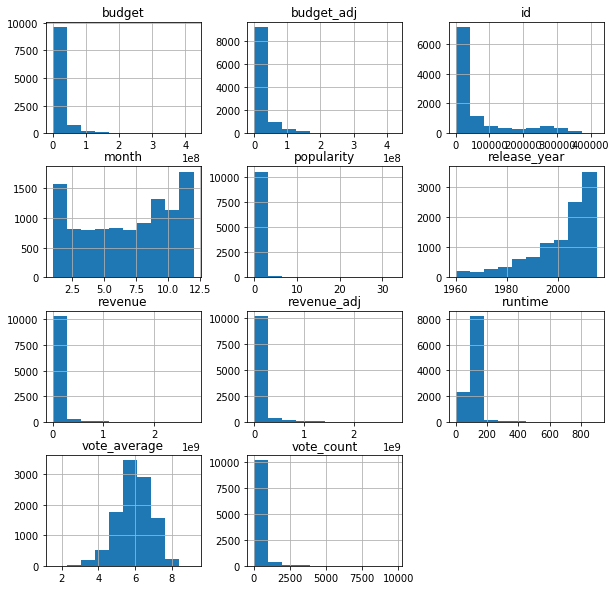

In [38]:
df.hist(figsize=(10,10))


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Which months of the year get more revenues?) <a id='Q1'></a>

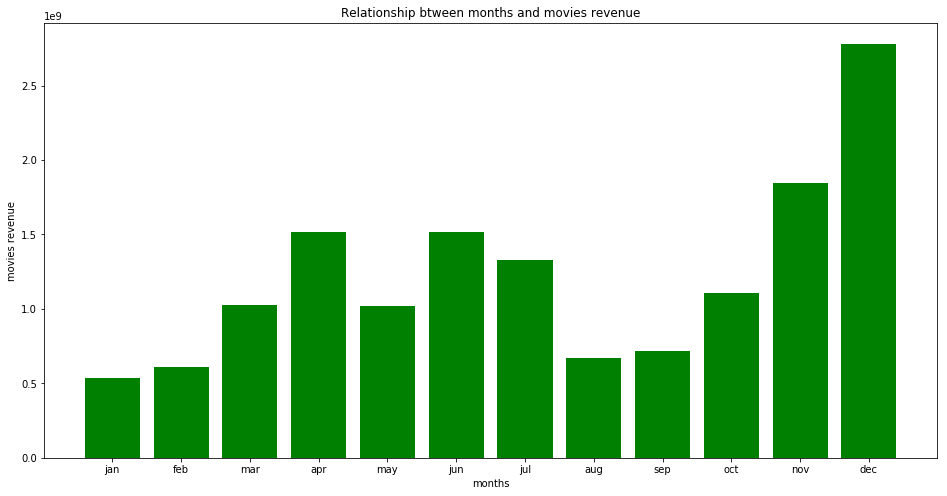

In [39]:
months = pd.Series(['jan','feb','mar','apr','may',
                   'jun','jul','aug','sep','oct','nov','dec'])
mon_nums = np.array([1, 2, 3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12])

plt.figure(figsize=(16,8))
plt.bar(df['month'] ,df['revenue'],color = 'green')
plt.title('Relationship btween months and movies revenue')
plt.xlabel('months') , plt.ylabel('movies revenue')
plt.xticks(mon_nums, months) #replacing month numbers with month names on the x-axis 
plt.show() 


### Research Question 2  (How an actor's popularity grow over the years (eg:Leonardo Dicaperio and jason statham)) <a id='Q2'></a>

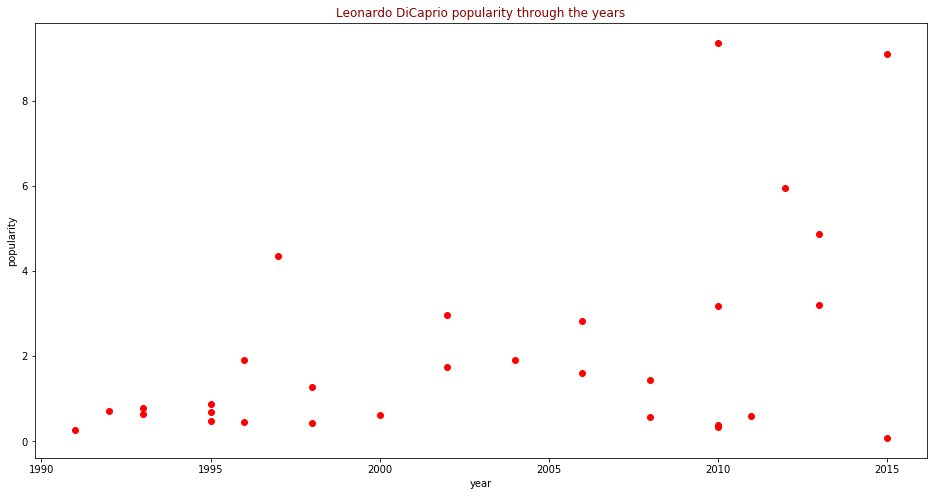

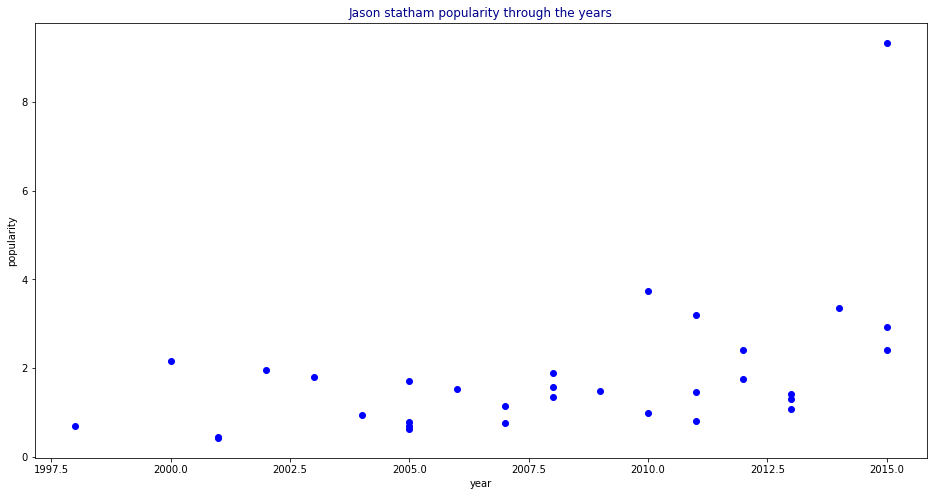

In [44]:
leo_year ,leo_pop ,jason_year ,jason_pop = [], [] ,[] ,[]


for i in range(df.shape[0]): #looping throgh the rows in the dataset
    if 'Leonardo DiCaprio' in df['cast'].iloc[i]: #check if the actor's name in the current row 
        leo_year.append(df['release_year'].iloc[i])
        leo_pop.append(df['popularity'].iloc[i])
    elif 'Jason Statham'in df['cast'].iloc[i]:
        jason_year.append(df['release_year'].iloc[i])
        jason_pop.append(df['popularity'].iloc[i])

#year and population are mapped together for both celebrities  

plt.figure(figsize=(16,8))
plt.scatter(leo_year,leo_pop ,color = 'red')
plt.title('Leonardo DiCaprio popularity through the years' ,color = 'darkred')
plt.xlabel('year'), plt.ylabel('popularity')
plt.show()

plt.figure(figsize=(16,8))
plt.scatter(jason_year,jason_pop ,color = 'blue')
plt.title('Jason statham popularity through the years',color = 'darkblue')
plt.xlabel('year'), plt.ylabel('popularity')

plt.show()



### Research Question 3 (Which genres of movies associated with more votes ?) <a id='Q3'></a>

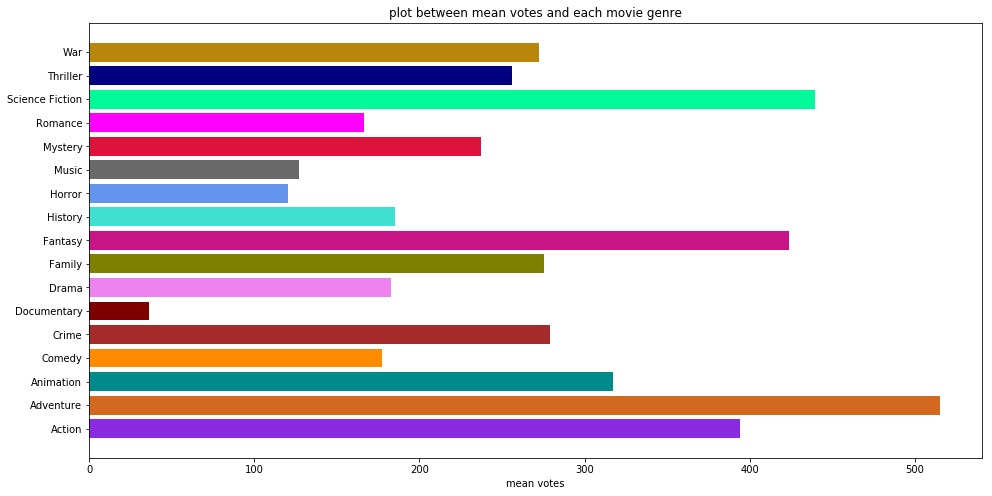

In [45]:
movies_count = {'Action':0,'Crime':0,'Horror':0,'Adventure':0,'War':0,'Mystery':0,'Comedy':0,
                     'Music':0,'Family':0, 'Drama':0,  'History':0,  'Thriller':0,  'Fantasy':0,
                     'Science Fiction':0, 'Romance':0, 'Documentary':0, 'Animation':0}
# saving the number of movies of each genre 

movies_vote_counts = {'Action':0,'Crime':0,'Horror':0,'Adventure':0,'War':0,'Mystery':0,'Comedy':0,
                     'Music':0,'Family':0, 'Drama':0,  'History':0,  'Thriller':0,  'Fantasy':0,
                     'Science Fiction':0, 'Romance':0, 'Documentary':0, 'Animation':0}
#saving the total vote_counts for each genre of movies 

movies_vote_mean_counts = [] #calculating the mean vote_counts for each genres 
                        # ==> total number of votes for a given genre /(divided by) the number of movies of that genre in DS 
index = 0  #(index of movies_vote_mean_counts list) mapping with each genre 

for i in range(df.shape[0]):
    for genre in movies_count:
        if genre in df['genres'].iloc[i]:
            movies_count[genre] += 1 #calc. tot numebr of each genre
            movies_vote_counts[genre] += df['vote_count'].iloc[i] #calc. total numebr of votes of each genre


for i in movies_count:
    movies_vote_mean_counts.insert(index,movies_vote_counts[i] / movies_count[i]) #calc. the mean vote for each genre
    index += 1


plt.figure(figsize=(16,8))
cls = ['#8A2BE2','#A52A2A','#6495ED','#D2691E','#B8860B','#DC143C','#FF8C00','#696969'
       ,'#808000','#EE82EE','#40E0D0','#000080',
       '#C71585','#00FA9A','#FF00FF','#800000','#008B8B']
plt.barh(list(movies_vote_counts.keys()) ,movies_vote_mean_counts
         ,color = cls )         #(genre ,associated mean of votes)

plt.title('plot between mean votes and each movie genre')
plt.xlabel('mean votes')
plt.show()



### Research Question 4  (What is the percentage of revenue across each genre ?)  <a id='Q4'></a>

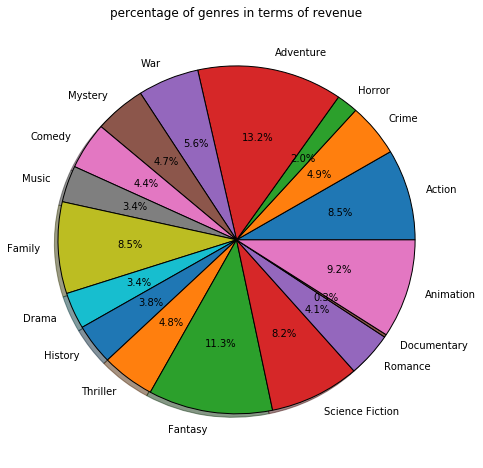

In [46]:
movies_revenue_counts = {'Action':0,'Crime':0,'Horror':0,'Adventure':0,'War':0,'Mystery':0,'Comedy':0,
                     'Music':0,'Family':0, 'Drama':0,  'History':0,  'Thriller':0,  'Fantasy':0,
                     'Science Fiction':0, 'Romance':0, 'Documentary':0, 'Animation':0}
#saving the total revenue for each genre of movies 

for i in range(df.shape[0]):
    for genre in movies_count:
        if genre in df['genres'].iloc[i]:
            movies_revenue_counts[genre] += df['revenue'].iloc[i]

movies_mean_revenue = []#calculating the mean revenue for each genre
                        # ==> total number of revenues for a given genre /(divided by) the number of movies of that genre in DS 
index = 0 #(movies_mean_revenue) mapping with each genre 

for i in movies_count:
    movies_mean_revenue.insert(index,movies_revenue_counts[i] / movies_count[i])  #calc. the mean revenue for each genre
    index += 1

plt.figure(figsize=(8,8))
plt.pie(movies_mean_revenue,labels=movies_count.keys() ,shadow=True,
        wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.title('percentage of genres in terms of revenue')
plt.show()


### Research Question 5  (How is budget, popularity ,revenue grew up over the years?)  <a id='Q5'></a>

In [55]:
def release_year_correlation(y_axis):
    plt.figure(figsize=(16, 8))
    yVar = df.groupby('release_year')[y_axis].sum()
    plt.title('Relationship between release year and movies revenue')
    plt.xlabel("Releas Year")
    plt.ylabel(y_axis)
    plt.plot(yVar)
    plt.show()


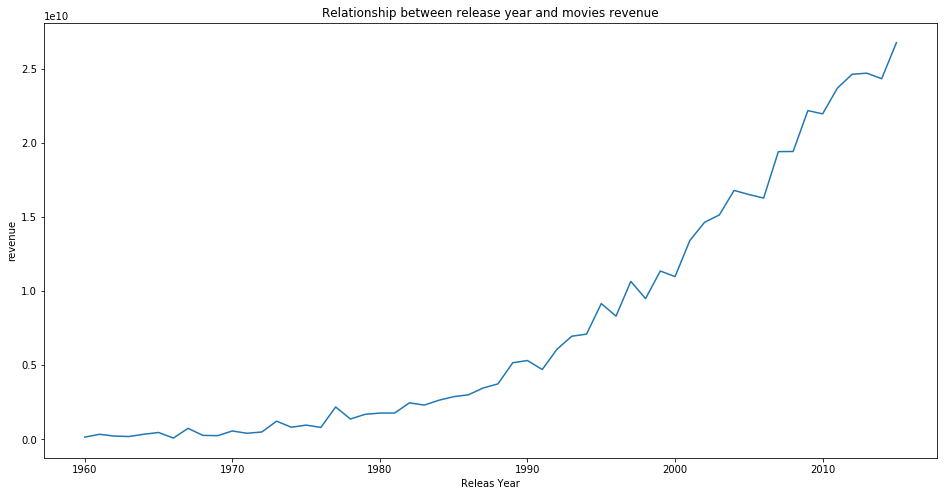

In [56]:
release_year_correlation('revenue')

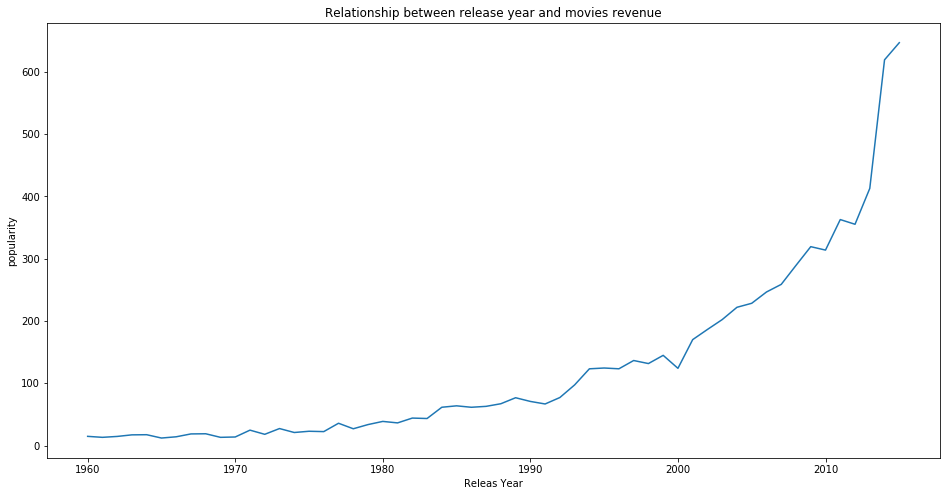

In [57]:
release_year_correlation('popularity')

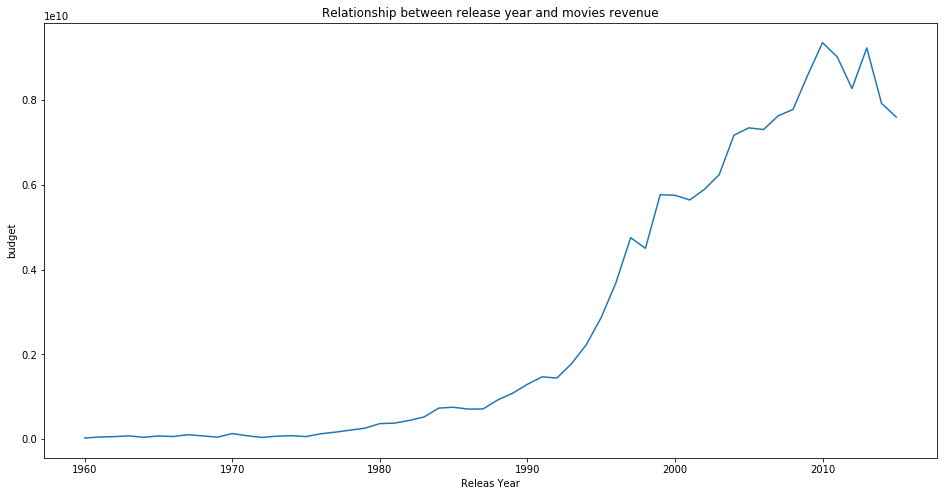

In [58]:
release_year_correlation('budget')

### Research Question 6  (How is the most movie durations ?)  <a id='Q6'></a>

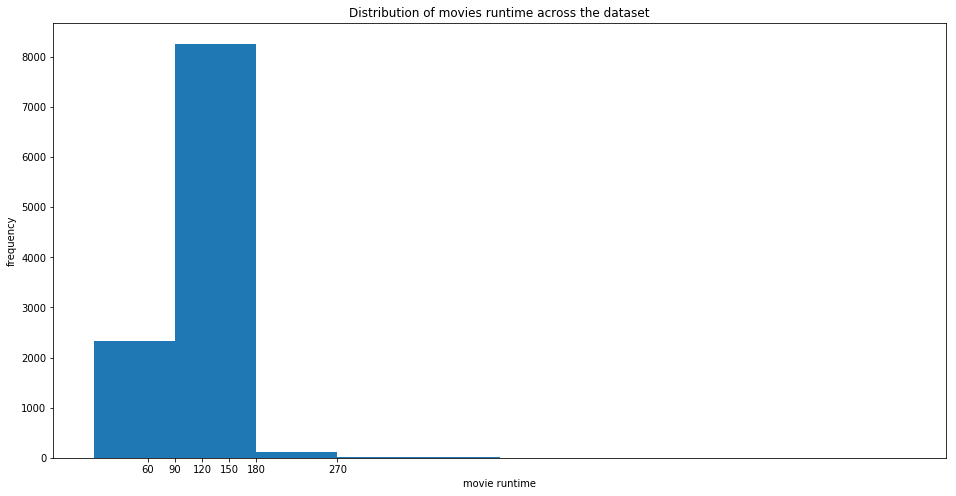

In [53]:
plt.figure(figsize=(16,8))
plt.hist(df['runtime'])
plt.xticks([60,90,120,150,180,270])
plt.title('Distribution of movies runtime across the dataset')
plt.xlabel('movie runtime') ,plt.ylabel('frequency')
plt.show()


### Research Question 7  (What is the most popular rating for movies ?)  <a id='Q7'></a>

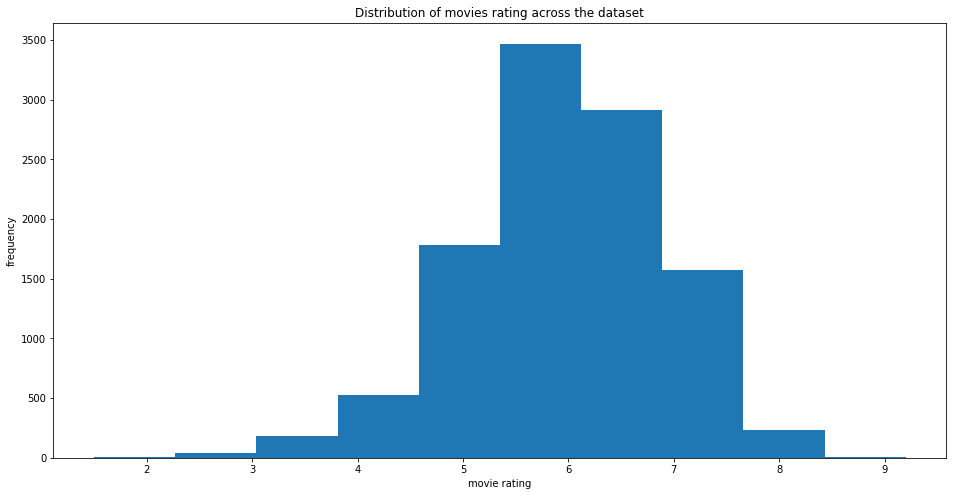

In [54]:
plt.figure(figsize=(16,8))
plt.hist(df['vote_average'])
plt.title('Distribution of movies rating across the dataset')
plt.xlabel('movie rating') ,plt.ylabel('frequency')
plt.show()


<a id='conclusions'></a>

## Limitations
   as shown at the beginning of the report through exploring the dataset, it has between 23
76 max of nan values across the columns used in the analysis, and one duplicated row found.
It's fixed by filling nan values by the mean, then removing the unneeded columns and the rest of the nan values dropped down all using pandas it is ended up from 10866 to 10729 total rows.

## Conclusions

1- Revenues reach the highest values at the end of the year in December.
Also, the mid-year in summer June, and July makes local maximum

2- the popularity of a movie star can be increased for a certain year then it keeps increasing through the years 

3-Adventure movies get the highest votes followed by science fiction, fantasy, and action 

4-Adventure and Fantasy are the highest revenues, however Horror, History, music, and drama 
are low and documentary ones are the lowest

5-Revenue, popularity, and budget are positively proportionated with years.
start from the 1990s made exponentially high 

6- most of the movies' runtime is between 1 hour and a half and 3 hours. a little number of movies above 3 hours.
some above 4.5 hours are TV-series

7- ratings are normally distributed however most movies lays between 5.5 and 6.2 


In [91]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0